In [2]:
import numpy as np
import os
import time

import matplotlib
from matplotlib import pyplot as plt

In [3]:
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 20

#matplotlib.rc('text', usetex=True)

## Load PROVABGS data

Downloaded from https://zenodo.org/records/8018936

In [100]:
fn_psmf_bgs_q = '../data/data_provabgs/psmf.sv3.bgs_bright_q.z0.01_0.05.dat'
ms_q, psmf_bgs_q_mean, psmf_bgs_q_std = np.loadtxt(fn_psmf_bgs_q, unpack=True)

fn_psmf_bgs_sf = '../data/data_provabgs/psmf.sv3.bgs_bright_sf.z0.01_0.05.dat'
ms_sf, psmf_bgs_sf_mean, psmf_bgs_sf_std = np.loadtxt(fn_psmf_bgs_sf, unpack=True)

In [104]:
np.all(ms_q==ms_sf)

True

In [107]:
ms = ms_sf

In [5]:
fn_smf_bgs = '../data/data_provabgs/smf.standard.sv3.bgs_bright.z0.01_0.05.dat'
ms_smf, smf_bgs = np.loadtxt(fn_smf_bgs, unpack=True)

In [108]:
fn_fq = '../data/data_provabgs/fig7.fq_z0.01_0.05.dat'
m_fq, fq_mean, fq_std = np.loadtxt(fn_fq, unpack=True)

Text(0, 0.5, 'quiescent fraction')

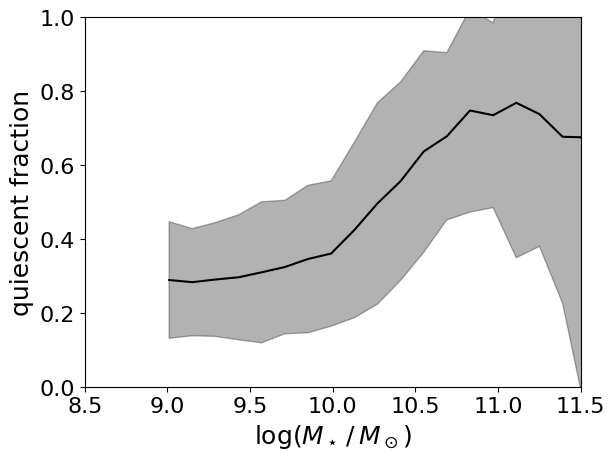

In [79]:
plt.plot(m_fq, fq_mean, color='k')
plt.fill_between(m_fq, 
                 fq_mean-fq_std, 
                 fq_mean+fq_std,
                 color='black', alpha=0.3)
plt.xlim(8.5, 11.5)
plt.ylim(0, 1)

plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel('quiescent fraction')

The y-axis is wrong in the paper it seems! Should be no $h$ in it.

In [86]:
i_complete = (ms>=np.min(m_fq)) & (ms<=np.max(m_fq))
ms_complete = ms[i_complete]
psmf_bgs_sf_mean_complete = psmf_bgs_sf_mean[i_complete]
psmf_bgs_q_mean_complete = psmf_bgs_q_mean[i_complete]

psmf_bgs_sf_std_complete = psmf_bgs_sf_std[i_complete]
psmf_bgs_q_std_complete = psmf_bgs_q_std[i_complete]

Text(0, 0.5, '$\\Phi \\: [\\mathrm{dex}^{-1}\\, \\mathrm{Mpc}^{-3}]$')

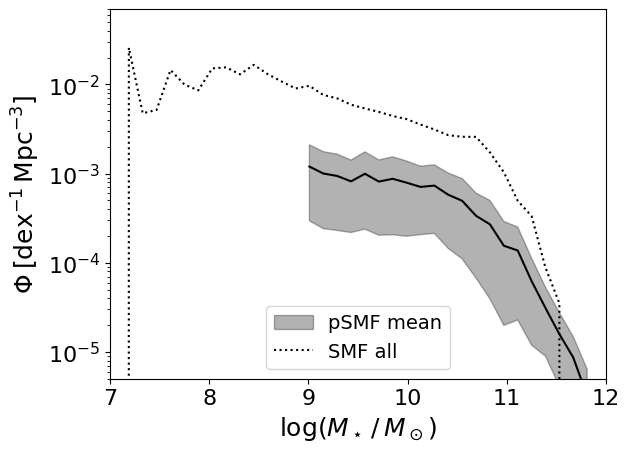

In [109]:
psmf_bgs_mean = (1-fq_mean)*psmf_bgs_sf_std_complete + fq_mean*psmf_bgs_q_std_complete
psmf_bgs_std = np.sqrt(((1-fq_mean)*psmf_bgs_sf_std_complete)**2 + (fq_mean*psmf_bgs_q_std_complete)**2)

plt.plot(m_fq, psmf_bgs_mean, color='black')
plt.fill_between(m_fq, 
                 psmf_bgs_mean-psmf_bgs_std, 
                 psmf_bgs_mean+psmf_bgs_std,
                 color='black', alpha=0.3,
                 label='pSMF mean')

plt.plot(ms_smf, smf_bgs, color='k', ls=':',
                 label='SMF all')

plt.legend(loc='lower center')

plt.yscale('log')
plt.xlim(7, 12)
plt.ylim(5e-6, 7e-2)

plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, \mathrm{Mpc}^{-3}]$')

Text(0, 0.5, '$\\Phi \\: [\\mathrm{dex}^{-1}\\, (\\mathrm{Mpc}/h)^{-3}]$')

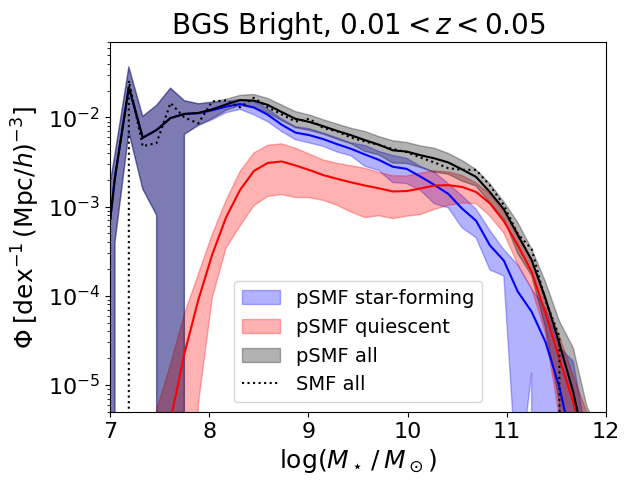

In [99]:
plt.title(r"BGS Bright, $0.01 < z < 0.05$")

plt.plot(ms, psmf_bgs_sf_mean, color='blue')
plt.fill_between(ms, 
                 psmf_bgs_sf_mean-psmf_bgs_sf_std, 
                 psmf_bgs_sf_mean+psmf_bgs_sf_std,
                 color='blue', alpha=0.3,
                 label='pSMF star-forming')

plt.plot(ms, psmf_bgs_q_mean, color='red')
plt.fill_between(ms, 
                 psmf_bgs_q_mean-psmf_bgs_q_std, 
                 psmf_bgs_q_mean+psmf_bgs_q_std,
                 color='red', alpha=0.3,
                 label='pSMF quiescent')

psmf_bgs_mean = psmf_bgs_sf_mean + psmf_bgs_q_mean
psmf_bgs_std = np.sqrt(psmf_bgs_sf_std**2 + psmf_bgs_q_std**2)

plt.plot(ms, psmf_bgs_mean, color='black')
plt.fill_between(ms, 
                 psmf_bgs_mean-psmf_bgs_std, 
                 psmf_bgs_mean+psmf_bgs_std,
                 color='black', alpha=0.3,
                 label='pSMF all')

plt.plot(ms_smf, smf_bgs, color='k', ls=':',
                 label='SMF all')

plt.legend(loc='lower center')

plt.yscale('log')
plt.xlim(7, 12)
plt.ylim(5e-6, 7e-2)

plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, (\mathrm{Mpc}/h)^{-3}]$')

## Investigate units issue

In [34]:
log_m_msun = np.array([9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.0])
log_phi_Mpcn3 = np.array([-1.899, -1.923, -1.970, -2.031, -2.055, -2.106, -2.144, -2.179, -2.188, -2.216, -2.234, -2.235, -2.262, -2.252, -2.285, -2.317, -2.365, -2.419, -2.504, -2.607, -2.728, -2.888, -3.104, -3.332, -3.606, -3.953, -4.363, -4.778, -5.255, -5.870, -6.490])

In [47]:
log_m_msun_B = np.array([9.05, 9.15, 9.25, 9.35, 9.45, 9.55, 9.65, 9.75, 9.85, 9.95, 10.05, 10.15, 10.25, 10.35, 10.45, 10.55, 10.65, 10.75, 10.85, 10.95, 11.05, 11.15, 11.25, 11.35, 11.45, 11.55, 11.65, 11.75, 11.85, 11.95, 12.05, 12.15])
log_phi_Mpcn3_B = np.array([-2.051, -2.075, -2.092, -2.089, -2.118, -2.159, -2.183, -2.208, -2.213, -2.231, -2.252, -2.240, -2.252, -2.250, -2.274, -2.314, -2.357, -2.421, -2.504, -2.611, -2.732, -2.885, -3.055, -3.252, -3.472, -3.715, -3.950, -4.254, -4.554, -4.881, -5.321, -5.742])

In [43]:
h = 0.678 # assumed in chang paper
m_msun = 10**log_m_msun
phi_Mpcn3 = 10**log_phi_Mpcn3
# X (Mpc/h)^-3 = X Mpc^-3 h^3 
# so to go from Mpc to Mpc/h, mult by h

# X Mpc^-3 = X (Mpc/h)^-3 h^3
phi_h3Mpcn3 = h**3 * phi_Mpcn3

In [55]:
m_msun_B = 10**log_m_msun_B
phi_Mpcn3_B = 10**log_phi_Mpcn3_B
phi_h3Mpcn3_B = h**3 * phi_Mpcn3_B

Text(0, 0.5, '$\\Phi \\: [\\mathrm{dex}^{-1}\\, (\\mathrm{Mpc})^{-3}]$')

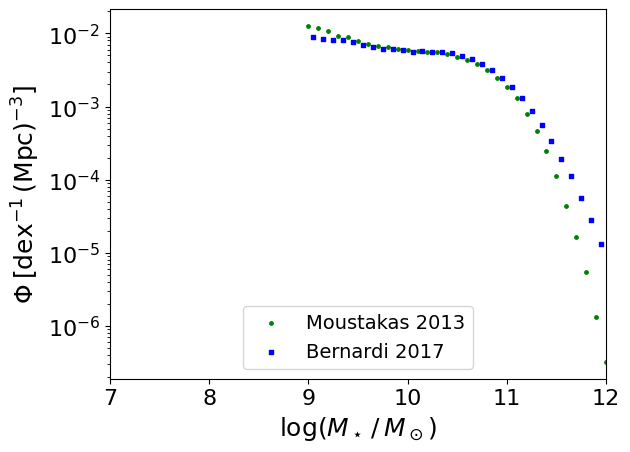

In [50]:
plt.scatter(log_m_msun, phi_Mpcn3, color='g', s=6, marker='o',
                 label='Moustakas 2013')

plt.scatter(log_m_msun_B, phi_Mpcn3_B, color='b', s=6, marker='s',
                 label='Bernardi 2017')

plt.legend(loc='lower center')

plt.yscale('log')
plt.xlim(7, 12)
#plt.ylim(5e-6, 7e-2)

plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, (\mathrm{Mpc})^{-3}]$')

In [24]:
# assuming each paper was unit it said:

Text(0, 0.5, '$\\Phi \\: [\\mathrm{dex}^{-1}\\, (\\mathrm{Mpc}/h)^{-3}]$')

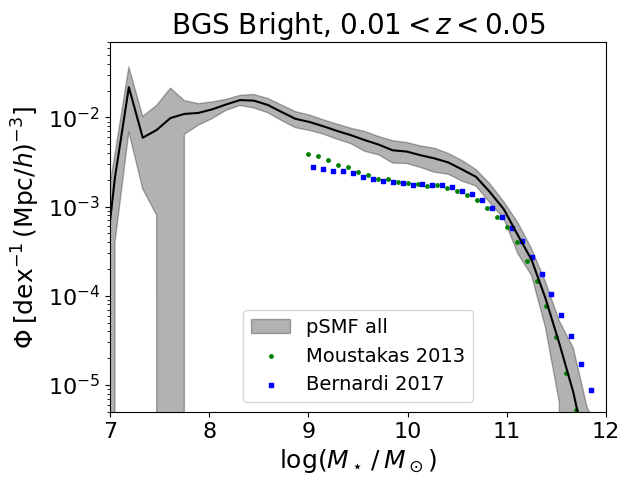

In [52]:
plt.title(r"BGS Bright, $0.01 < z < 0.05$")

psmf_bgs_mean = psmf_bgs_sf_mean + psmf_bgs_q_mean
psmf_bgs_std = np.sqrt(psmf_bgs_sf_std**2 + psmf_bgs_q_std**2)

plt.plot(ms, psmf_bgs_mean, color='black')
plt.fill_between(ms, 
                 psmf_bgs_mean-psmf_bgs_std, 
                 psmf_bgs_mean+psmf_bgs_std,
                 color='black', alpha=0.3,
                 label='pSMF all')

plt.scatter(log_m_msun, phi_h3Mpcn3, color='g', s=6, marker='o',
                 label='Moustakas 2013')

plt.scatter(log_m_msun_B, phi_h3Mpcn3_B, color='b', s=6, marker='s',
                 label='Bernardi 2017')

plt.legend(loc='lower center')

plt.yscale('log')
plt.xlim(7, 12)
plt.ylim(5e-6, 7e-2)

plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, (\mathrm{Mpc}/h)^{-3}]$')

In [38]:
# ssuming  BGS is actually in just Mpc^-3

Text(0, 0.5, '$\\Phi \\: [\\mathrm{dex}^{-1}\\, (\\mathrm{Mpc})^{-3}]$')

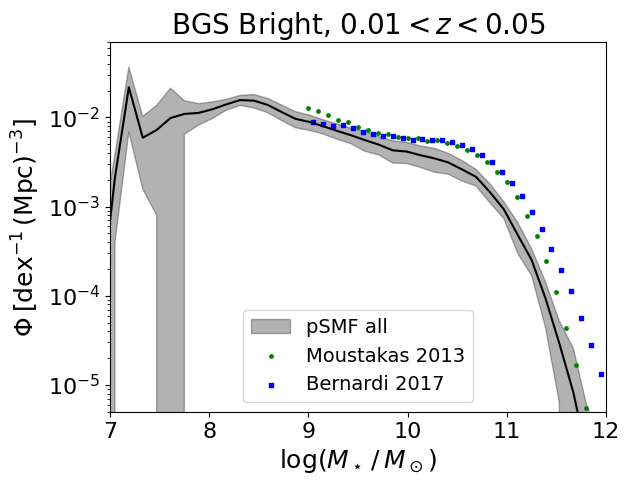

In [53]:
plt.title(r"BGS Bright, $0.01 < z < 0.05$")

psmf_bgs_mean = psmf_bgs_sf_mean + psmf_bgs_q_mean
psmf_bgs_std = np.sqrt(psmf_bgs_sf_std**2 + psmf_bgs_q_std**2)

plt.plot(ms, psmf_bgs_mean, color='black')
plt.fill_between(ms, 
                 psmf_bgs_mean-psmf_bgs_std, 
                 psmf_bgs_mean+psmf_bgs_std,
                 color='black', alpha=0.3,
                 label='pSMF all')

plt.scatter(log_m_msun, phi_Mpcn3, color='g', s=6, marker='o',
                 label='Moustakas 2013')

plt.scatter(log_m_msun_B, phi_Mpcn3_B, color='b', s=6, marker='s',
                 label='Bernardi 2017')

plt.legend(loc='lower center')

plt.yscale('log')
plt.xlim(7, 12)
plt.ylim(5e-6, 7e-2)

plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, (\mathrm{Mpc})^{-3}]$')

In [56]:
# Msun = Msun/h * h
# Msun/h = Msun / h
m_msun_timesh = m_msun * h
log_m_msun_timesh = np.log10(m_msun_timesh)

m_msun_timesh_B = m_msun_B * h
log_m_msun_timesh_B = np.log10(m_msun_timesh_B)

Text(0, 0.5, '$\\Phi \\: [\\mathrm{dex}^{-1}\\, (\\mathrm{Mpc}/h)^{-3}]$')

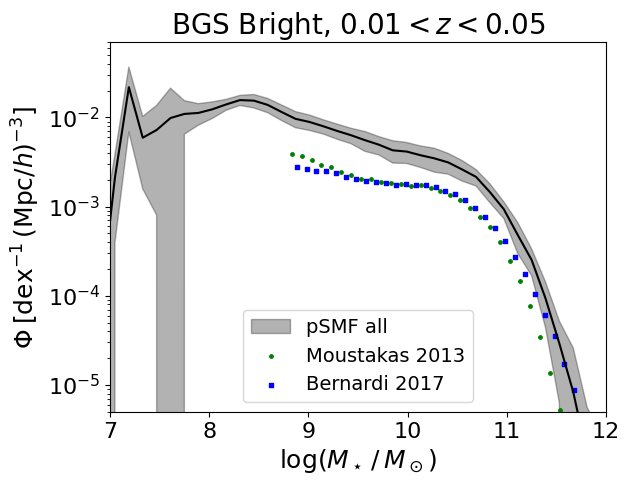

In [57]:
plt.title(r"BGS Bright, $0.01 < z < 0.05$")

psmf_bgs_mean = psmf_bgs_sf_mean + psmf_bgs_q_mean
psmf_bgs_std = np.sqrt(psmf_bgs_sf_std**2 + psmf_bgs_q_std**2)

plt.plot(ms, psmf_bgs_mean, color='black')
plt.fill_between(ms, 
                 psmf_bgs_mean-psmf_bgs_std, 
                 psmf_bgs_mean+psmf_bgs_std,
                 color='black', alpha=0.3,
                 label='pSMF all')

plt.scatter(log_m_msun_timesh, phi_h3Mpcn3, color='g', s=6, marker='o',
                 label='Moustakas 2013')

plt.scatter(log_m_msun_timesh_B, phi_h3Mpcn3_B, color='b', s=6, marker='s',
                 label='Bernardi 2017')

plt.legend(loc='lower center')

plt.yscale('log')
plt.xlim(7, 12)
plt.ylim(5e-6, 7e-2)

plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, (\mathrm{Mpc}/h)^{-3}]$')

### h wrong in both axes?

Text(0, 0.5, '$\\Phi \\: [\\mathrm{dex}^{-1}\\, (\\mathrm{Mpc})^{-3}]$')

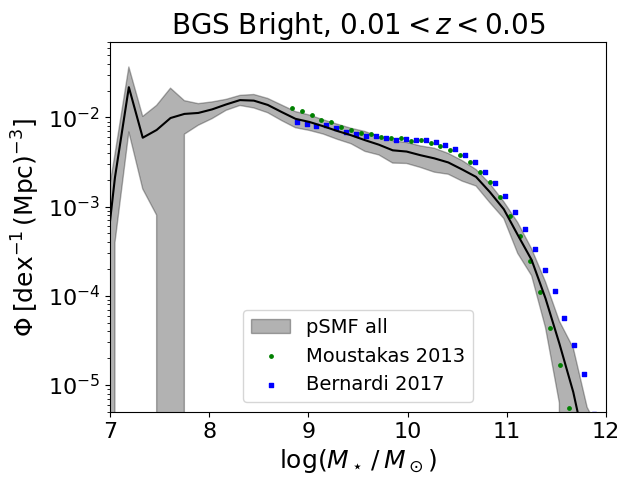

In [58]:
plt.title(r"BGS Bright, $0.01 < z < 0.05$")

psmf_bgs_mean = psmf_bgs_sf_mean + psmf_bgs_q_mean
psmf_bgs_std = np.sqrt(psmf_bgs_sf_std**2 + psmf_bgs_q_std**2)

plt.plot(ms, psmf_bgs_mean, color='black')
plt.fill_between(ms, 
                 psmf_bgs_mean-psmf_bgs_std, 
                 psmf_bgs_mean+psmf_bgs_std,
                 color='black', alpha=0.3,
                 label='pSMF all')

plt.scatter(log_m_msun_timesh, phi_Mpcn3, color='g', s=6, marker='o',
                 label='Moustakas 2013')

plt.scatter(log_m_msun_timesh_B, phi_Mpcn3_B, color='b', s=6, marker='s',
                 label='Bernardi 2017')

plt.legend(loc='lower center')

plt.yscale('log')
plt.xlim(7, 12)
plt.ylim(5e-6, 7e-2)

plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, (\mathrm{Mpc})^{-3}]$')

## Load CAMELS-SAM data

Downloaded from https://camels-sam.readthedocs.io/en/main/access.html

In [6]:
log_mass_shift = 9
h = 0.6711 # from perez et al
print(h**3)
vol_Mpc = (100/h)**3 # 100 Mpc/h = 100/h Mpc
vol_hMpc = 100**3 # units Mpc/h!! to match bgs; diff than plotted in camels paper
print(vol_Mpc, vol_hMpc)

0.302246803431
3308554.428527777 1000000


In [7]:
edges = np.linspace(8, 12.5, 40)

bin_width = edges[1] - edges[0]                
bins_avg = edges[0:-1] + bin_width/2.           

In [8]:
N_LH = 1000
sim_nums = np.arange(0, N_LH)
rng = np.random.default_rng(seed=42)
rng.shuffle(sim_nums)
sim_nums[:10]

array([978, 933, 859, 916, 127, 608, 856, 260, 147, 810])

In [9]:
sim_start = 0
sim_end = 1000

data_dir = '../data/data_camels-sam/data_mstars_shuffled'

log_mstars = []
for i in range(sim_start, sim_end):
    sim_num = sim_nums[i]
    fn_data = f'{data_dir}/mstars_LH_{sim_num}.npy'
    #print(fn_data)
    data_arrs = np.load(fn_data)
    halo_ids, mstar_raw = data_arrs.T
    
    log_mstar = np.log10(mstar_raw) + log_mass_shift
    log_mstars.append(log_mstar)

/tmp/ipykernel_106219/3182765636.py:15: RuntimeWarning: divide by zero encountered in log10
  log_mstar = np.log10(mstar_raw) + log_mass_shift


In [10]:
n_plot = 30

## Plot both SMFs together

(8.0, 12.5)

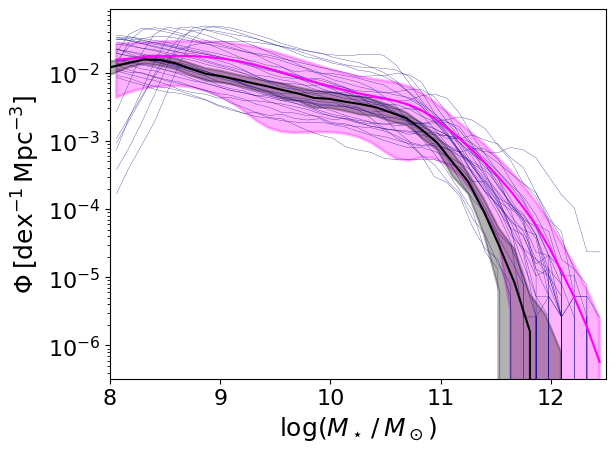

In [12]:
phi_norms = []
for i in range(len(log_mstars)):
    
    phi, edges = np.histogram(log_mstars[i], bins=edges)   
    phi_norm = phi / vol_Mpc / bin_width
    phi_norms.append(phi_norm)

for i in range(n_plot):
    plt.plot(bins_avg, phi_norms[i], lw=0.2, color='navy')
    

smf_mean = np.mean(phi_norms, axis=0)
smf_std = np.std(phi_norms, axis=0)
plt.plot(bins_avg, smf_mean, color='magenta')
plt.fill_between(bins_avg, 
                 (smf_mean-smf_std), 
                 (smf_mean+smf_std),
                 color='magenta', alpha=0.3, lw=2,
                 label='pSMF all')
    
plt.yscale('log')
plt.xlabel(r'$\log(M_\star\,/\,M_\odot)$')
plt.ylabel(r'$\Phi \: [\mathrm{dex}^{-1}\, \mathrm{Mpc}^{-3}]$')

# psmf orig in (h^3 Mpc^-3); so need to mult by 0.7**3
#rescale_noh = 0.7**3
rescale_noh = 1
plt.plot(ms, psmf_bgs_mean*rescale_noh, color='black')
plt.fill_between(ms, 
                 (psmf_bgs_mean-psmf_bgs_std)*rescale_noh, 
                 (psmf_bgs_mean+psmf_bgs_std)*rescale_noh,
                 color='black', alpha=0.3, lw=1.5,
                 label='pSMF all')

plt.xlim(8, 12.5)
#plt.savefig('smf_camelssam_shuffled_n1-10.png')

## Check number densities

In [13]:
ndens_arr = []
for i in range(sim_start, sim_end):
    phi, edges = np.histogram(log_mstars[i], bins=edges)   
    phi_norm = phi / vol_Mpc / bin_width

    ndens_trapz = np.trapz(phi_norm, x=bins_avg)
    ndens = len(log_mstars[i][log_mstars[i]>edges[0]])/vol_Mpc
    #print("Num dens from integration:", ndens)
    #print("Num dens direct:", )
    ndens_arr.append(ndens)

In [14]:
print("PROVABGS num dens from integration (all):", np.trapz(psmf_bgs_mean, x=ms))
ndens_bgs = np.trapz(psmf_bgs_mean[ms>edges[0]], x=ms[ms>edges[0]])
print(f"PROVABGS num dens from integration (logM>{edges[0]}):", ndens_bgs)

PROVABGS num dens from integration (all): 0.03209675793436594
PROVABGS num dens from integration (logM>8.0): 0.021533505401047537


Text(0, 0.5, 'number per bin')

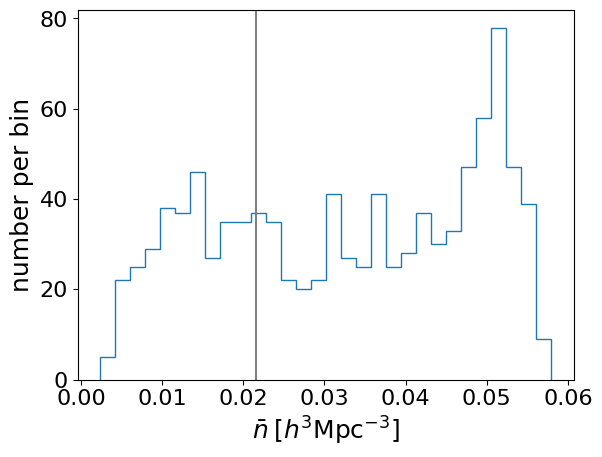

In [15]:
plt.hist(ndens_arr, bins=30, histtype='step')
plt.axvline(ndens_bgs, color='grey')
#plt.xlim(0, 0.2)
plt.xlabel(r'$\bar{n} \: [h^{3} \mathrm{Mpc}^{-3}]$')
plt.ylabel('number per bin')

## Get consistent models

In [16]:
def get_distance_sigma(x1, y1, yerr1, x2, y2, xrange):
    xmin, xmax = xrange

    y1 = y1[(x1>=xmin) & (x1<xmax)]
    yerr1 = yerr1[(x1>=xmin) & (x1<xmax)]
    y2 = y2[(x2>=xmin) & (x2<xmax)]

    x1 = x1[(x1>=xmin) & (x1<xmax)]
    x2 = x2[(x2>=xmin) & (x2<xmax)]
    
    # interpolate y2 to be at the same x-vals as x2/y2
    y2_interp = np.interp(x1, x2, y2)
    sigmas = (y2_interp - y1)/yerr1
    sigma_mean = np.mean(np.abs(sigmas))
    return sigma_mean

In [17]:
sigma_means = []
xrange = [8,11]
for i in range(len(log_mstars)):
    
    phi, edges = np.histogram(log_mstars[i], bins=edges)   
    phi_norm = phi / vol_Mpc / bin_width

    sigma_mean = get_distance_sigma(ms, psmf_bgs_mean, psmf_bgs_std, bins_avg, phi_norm, xrange)
    sigma_means.append(sigma_mean)
sigma_means = np.array(sigma_means)

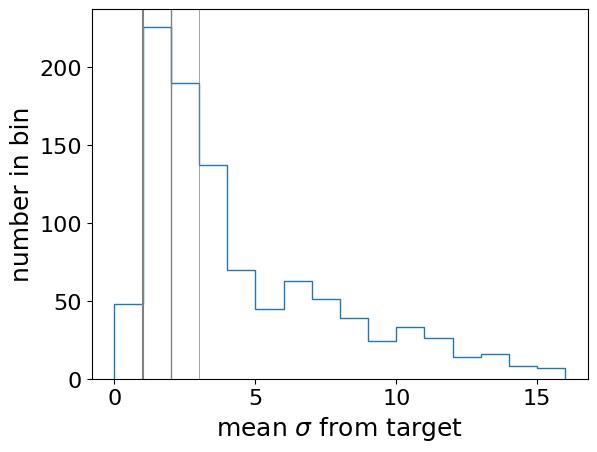

In [18]:
plt.hist(sigma_means, bins=np.arange(0, int(np.max(sigma_means)+1)), histtype='step')
plt.xlabel(r'mean $\sigma$ from target')
plt.ylabel('number in bin')
plt.axvline(1, color='grey', lw=1.5)
plt.axvline(2, color='grey', lw=1)
plt.axvline(3, color='grey', lw=0.5)

In [19]:
for sig in range(1, 4):
    print(f'Fraction within {sig}\sigma: {np.sum(sigma_means<sig)/len(sigma_means):.2f}')

Fraction within 1\sigma: 0.05
Fraction within 2\sigma: 0.27
Fraction within 3\sigma: 0.46


In [21]:
sim_nums[sigma_means.argsort()][:10]

array([613, 257,  61, 579,  96, 524, 581, 541, 647, 137])